In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Downloading Dataset

col_names = ['Age of patients','Year of Operation','Number of positive nodes', 'Survival status'] #1=the patient survived 5 years or longer*2=the patient died within 5 year

df = pd.read_csv("https://query.data.world/s/yvicka4w4y7hiqsaai2jfmn563b64d", names=col_names)
df.head()

,Age of patients,Year of Operation,Number of positive nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# Data Selection and Normalization

X = np.asarray(df[['Age of patients','Year of Operation','Number of positive nodes']])
X[0:5]
y = np.asarray(df['Survival status']-1)
y [0:40]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [4]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-2.08214014,  0.35358406, -0.42159203],
       [-2.08214014, -0.26292148, -0.14295885],
       [-2.08214014,  0.66183684, -0.56090862],
       [-1.98942552, -1.18767981, -0.28227544],
       [-1.98942552,  0.66183684, -0.00364226]])

In [5]:
# Dataset Splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (244, 3) (244,)
Test set: (62, 3) (62,)


In [6]:
# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)

# Predict
yhat = LR.predict(X_test)

# Probability Prediction
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.51792407, 0.48207593],
       [0.51581716, 0.48418284],
       [0.52035726, 0.47964274],
       [0.51448965, 0.48551035],
       [0.51156052, 0.48843948],
       [0.51384957, 0.48615043],
       [0.50355978, 0.49644022],
       [0.51586316, 0.48413684],
       [0.52103975, 0.47896025],
       [0.50231512, 0.49768488],
       [0.51764987, 0.48235013],
       [0.51347749, 0.48652251],
       [0.52126723, 0.47873277],
       [0.51359854, 0.48640146],
       [0.51727498, 0.48272502],
       [0.50874896, 0.49125104],
       [0.51261196, 0.48738804],
       [0.51952869, 0.48047131],
       [0.5144744 , 0.4855256 ],
       [0.51548942, 0.48451058],
       [0.51651176, 0.48348824],
       [0.51678539, 0.48321461],
       [0.51228113, 0.48771887],
       [0.51699033, 0.48300967],
       [0.51732159, 0.48267841],
       [0.51592144, 0.48407856],
       [0.51087658, 0.48912342],
       [0.50976989, 0.49023011],
       [0.5012992 , 0.4987008 ],
       [0.51582881, 0.48417119],
       [0.

In [7]:
# Evaluation Using Jaccard Metric

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.7666666666666667

In [8]:
# Evaluation Using Jaccard Metric

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6757611562172934

In [9]:
# Evaluation Using Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 2 14]
 [ 0 46]]


Confusion matrix, without normalization
[[ 2 14]
 [ 0 46]]


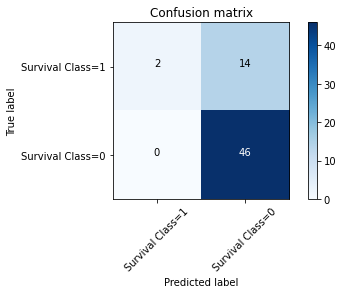

In [10]:
# Compute Confusion Matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survival Class=1','Survival Class=0'],normalize= False,  title='Confusion matrix')

In [11]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       1.00      0.12      0.22        16

    accuracy                           0.77        62
   macro avg       0.88      0.56      0.55        62
weighted avg       0.83      0.77      0.70        62

